Personal Project Work

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import squarify

# Import for Hypothesis Testing
import scipy.stats as stats

# Import for acquisition
import env
import os
import wrangle

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## PROJECT DESCRIPTION

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This project aims to improve upon the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

## PROJECT GOAL

The goal of this project is to build a model that borrowers can use to help make the best financial decisions.

## I. ACQUIRE

In [2]:
# acquire dataset
df = pd.read_csv('client_data.csv')
# view first few rows
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
# size of dataset
df.shape

(150000, 12)

In [4]:
# view column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


===================================================================================================================================

## II. PREPARE

Tasks to prepare:

- Delete "Unnamed' index
- Rename columns for understanding, while making lowercase
- Drop missing values (29_731 in monthly_income and 3_924 in quantity_dep)
- Deal with outliers - only if they impact exploration or modeling

In [7]:
# apply the data preparation observations and tasks to clean the data using the wrangle_client function found in the wrangle.py
df = wrangle.wrangle_client(df)
df.head()

,serious_delinquency,revolv_unsec_utilization,age,quantity_30-59_pd,debt_to_income_ratio,monthly_income,quantity_loans_and_lines,quantity_90_days_pd,quantity_real_estate_loans,quantity_60_89_days_pd,quantity_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### PREPARE - SPLIT

In [8]:
# split the data into train, validate, and test using the split_data function found in the wrangle.py
train, validate, test = wrangle.split_data(df)

train -> (67350, 11)
validate -> (28865, 11)
test -> (24054, 11)


===================================================================================================================================

## III. EXPLORE

### EXPLORE - Univariate

In [9]:
plt.rc('figure', figsize=(20, 8))
# determine font size
plt.rc('font', size=15)
# determine style
plt.style.use('bmh')

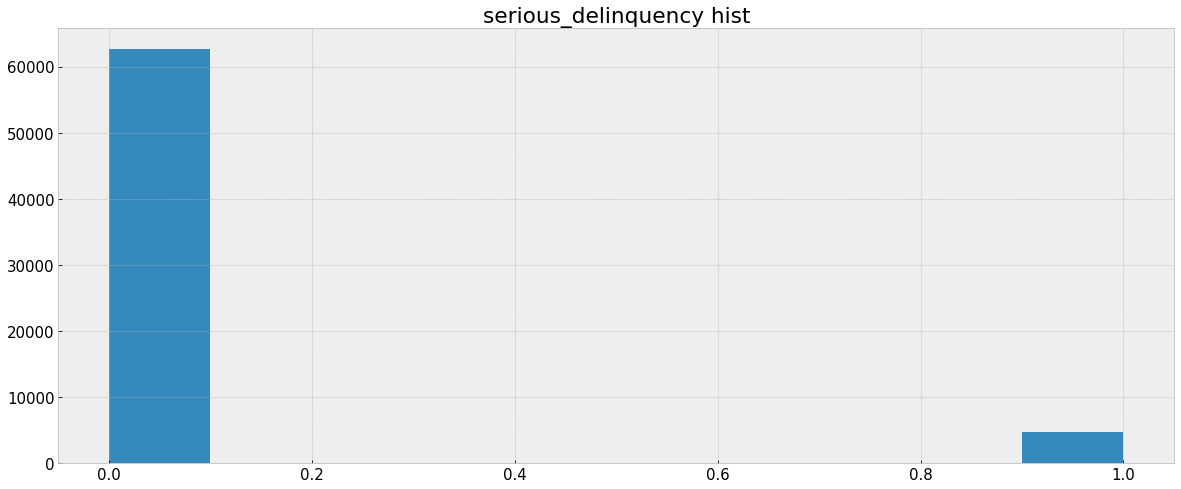

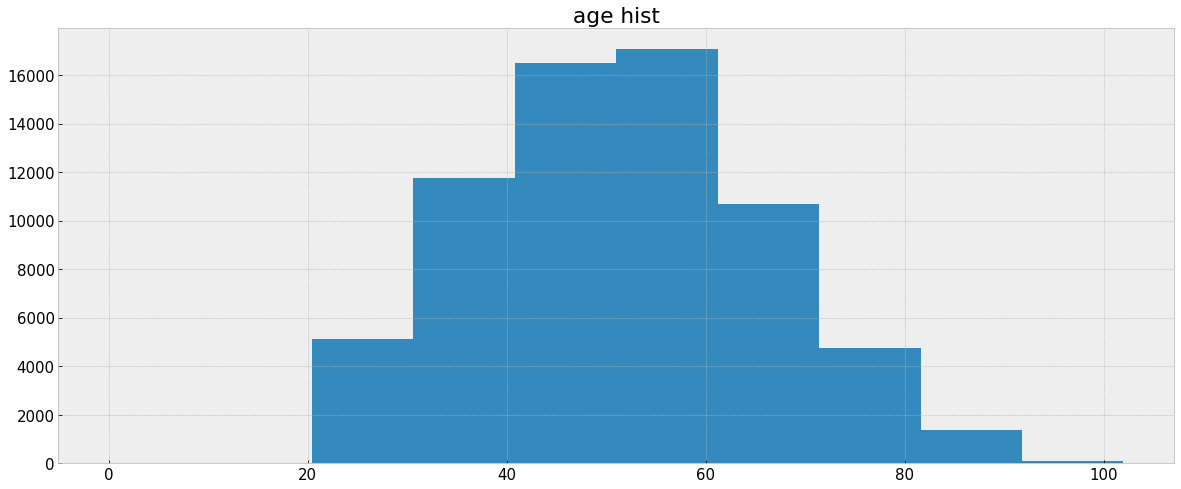

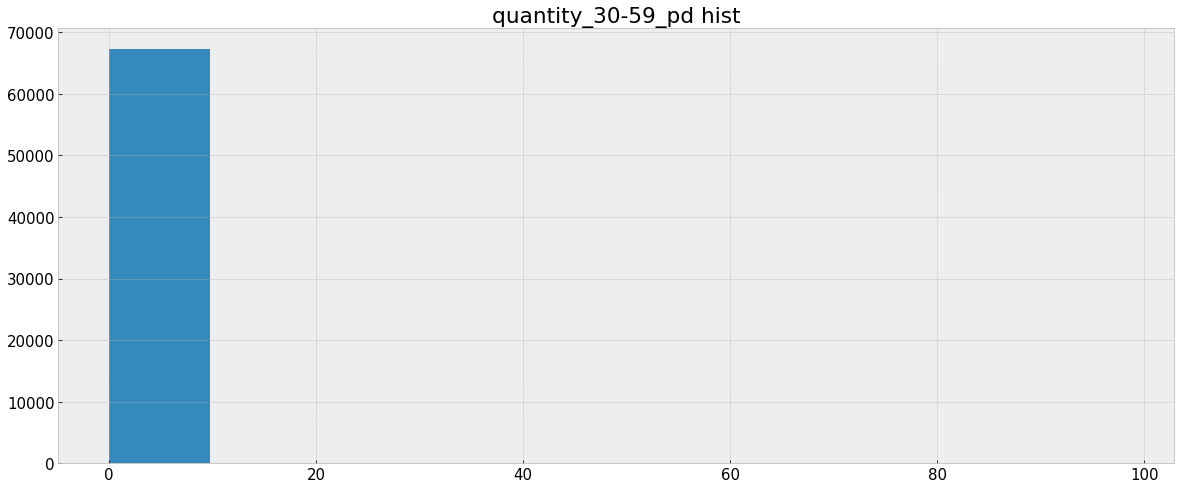

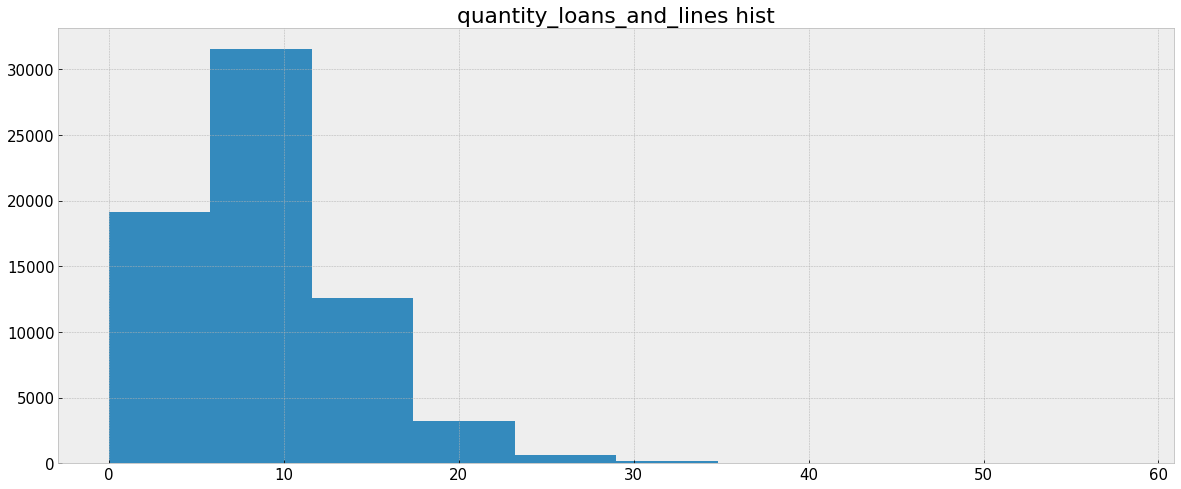

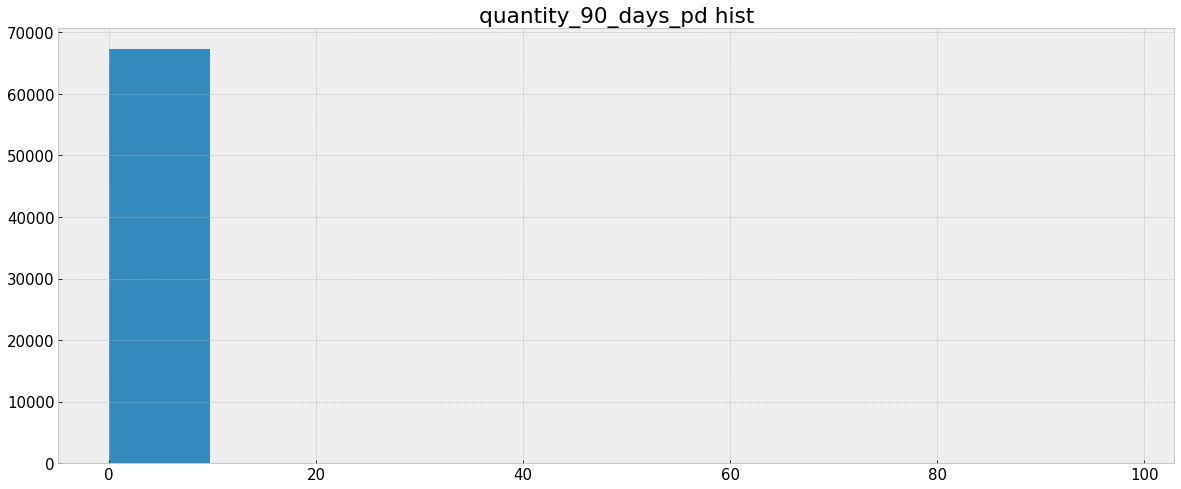

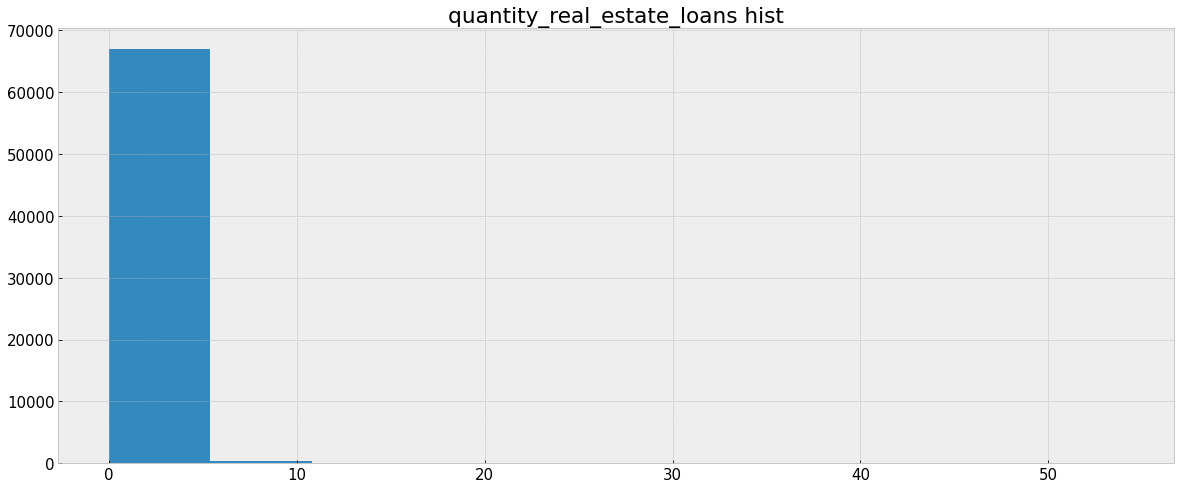

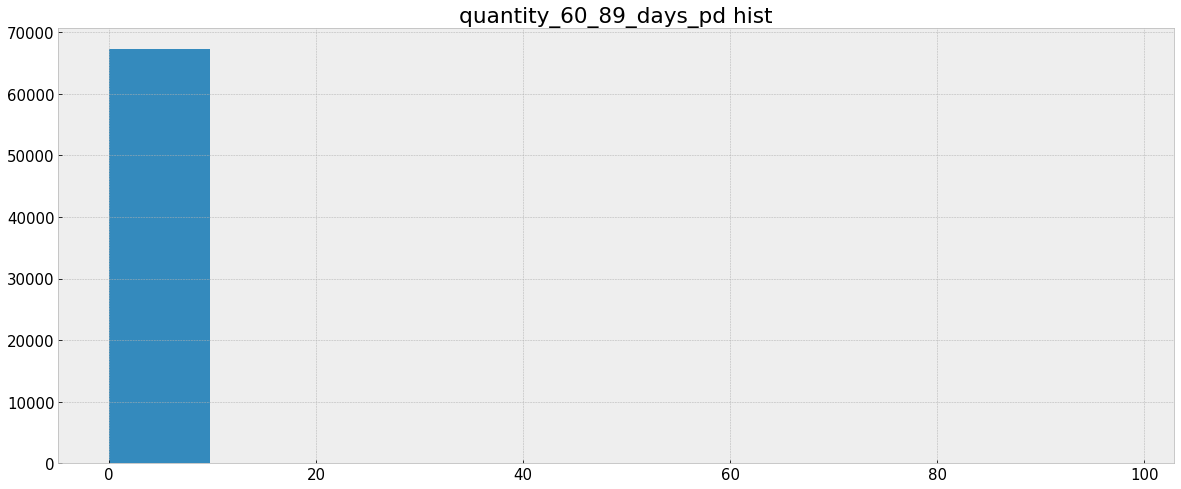

In [10]:
# create distribution visualizations for columns with int datatypes
for col in train.columns[train.dtypes == int]:
    plt.hist(train[col])
    plt.title(col +' hist')
    plt.show()

### EXPLORE QUESTIONS

0    62656
1     4694
Name: serious_delinquency, dtype: int64


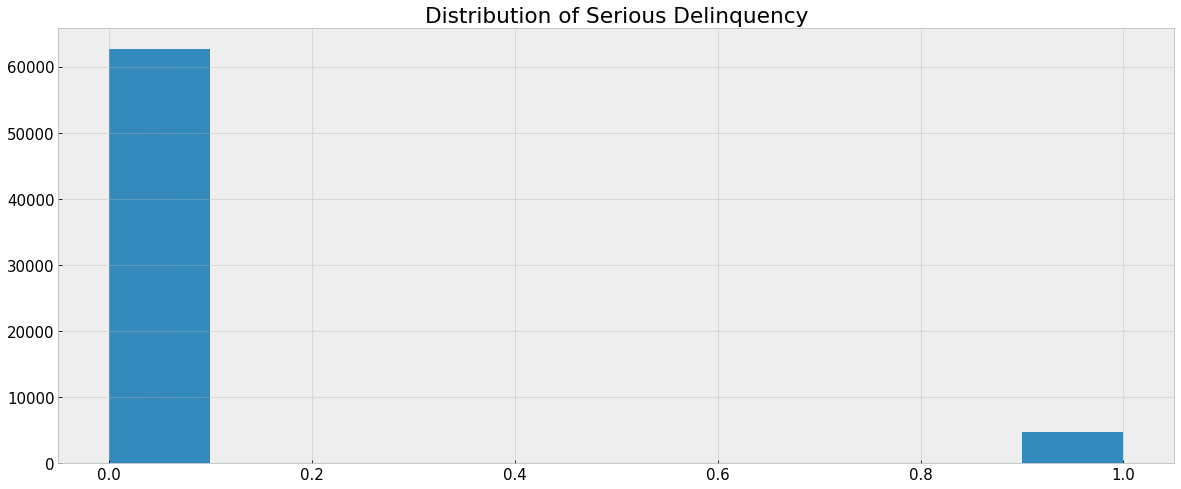

In [11]:
# View distribution of target variable: serious_delinquency
print(train.serious_delinquency.value_counts())
plt.title("Distribution of Serious Delinquency")
train.serious_delinquency.hist()
plt.show()

0    62656
1     4694
Name: serious_delinquency, dtype: int64


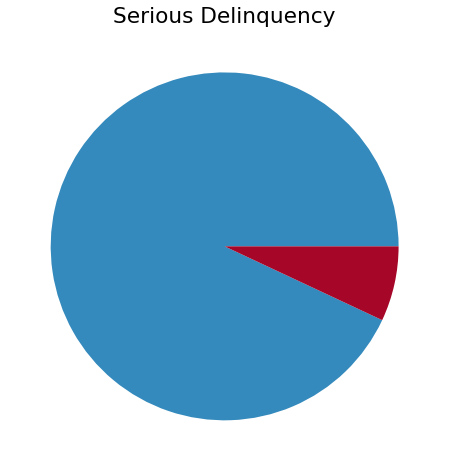

Percent seriously delinquent from train


0.07

In [17]:
# Another visual option. 

print(train.serious_delinquency.value_counts())

y = train.serious_delinquency.value_counts()
plt.title('Serious Delinquency')
plt.pie(y)
plt.show() 

print("Percent seriously delinquent from train")
round(train.serious_delinquency.mean(), 3)

### EXPLORE - Bivariate

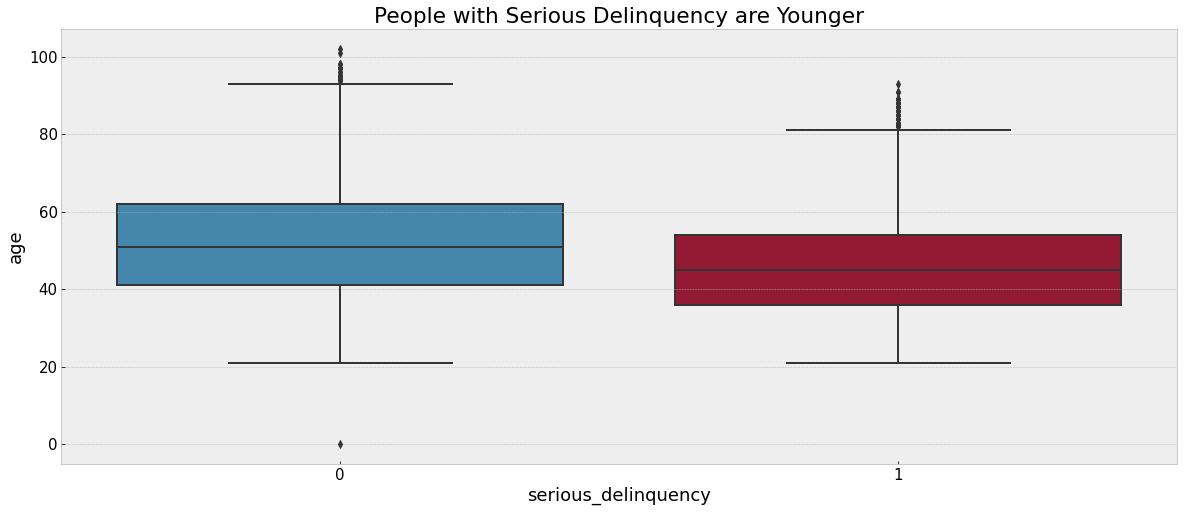

In [21]:
# create visualization for relationchip between age and serious delinquency
plt.title("People with Serious Delinquency are Younger")
sns.boxplot(data = train, x = 'serious_delinquency', y = 'age')
plt.show()

In [28]:
train.groupby(['serious_delinquency']).age.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0,51.727656,102
1,21,45.796336,93


### ANSWER:
- Those with serious delinquency are 6 years younger than those without serious delinquency, at 45.8 years old. 

----

### QUESTION

What is the relationship between number of dependents and serious delinquency?

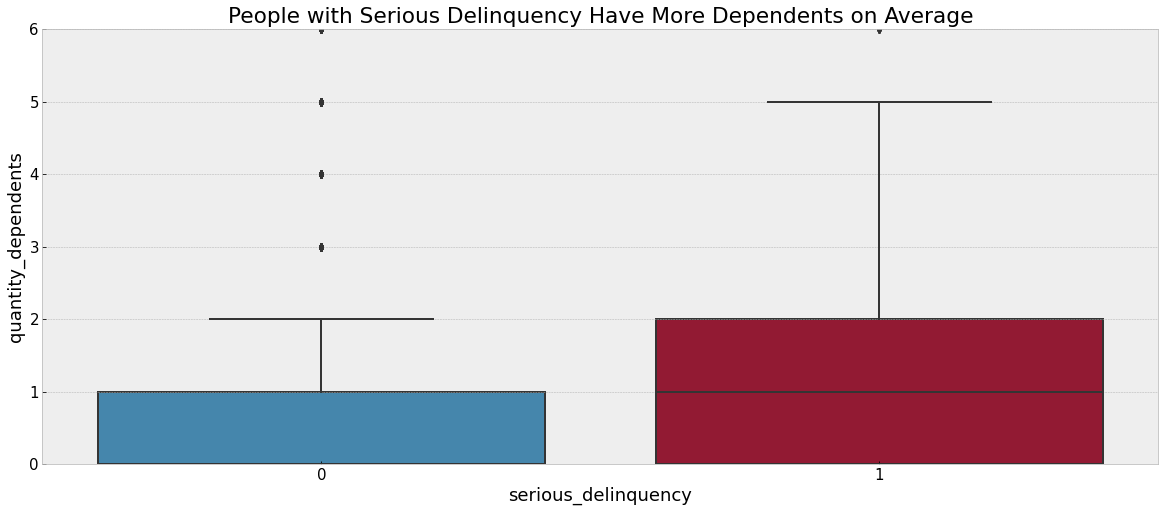

In [14]:
# create visualization for relationchip between number of dependents and serious delinquency
plt.title("People with Serious Delinquency Have More Dependents on Average")
ax=sns.boxplot(data = train, x = 'serious_delinquency', y = 'quantity_dependents')
ax.set_ylim(0, 6)
plt.show()

In [20]:
train.groupby(['serious_delinquency']).quantity_dependents.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,0.834046,20.0
1,0.0,1.033660,8.0


### ANSWER:
- Those with serious delinquency have 1 or more dependents on average, 1 more than those without serious delinquency, who have fewer than 1 depedent on average.  

### QUESTION

What is the relationship between monthly income and serious delinquency?

In [23]:
# subset the data into no serious delinquency and serious delinquency
no_serious_delinquency = train[train.serious_delinquency == 0]
serious_delinquency = train[train.serious_delinquency == 1]

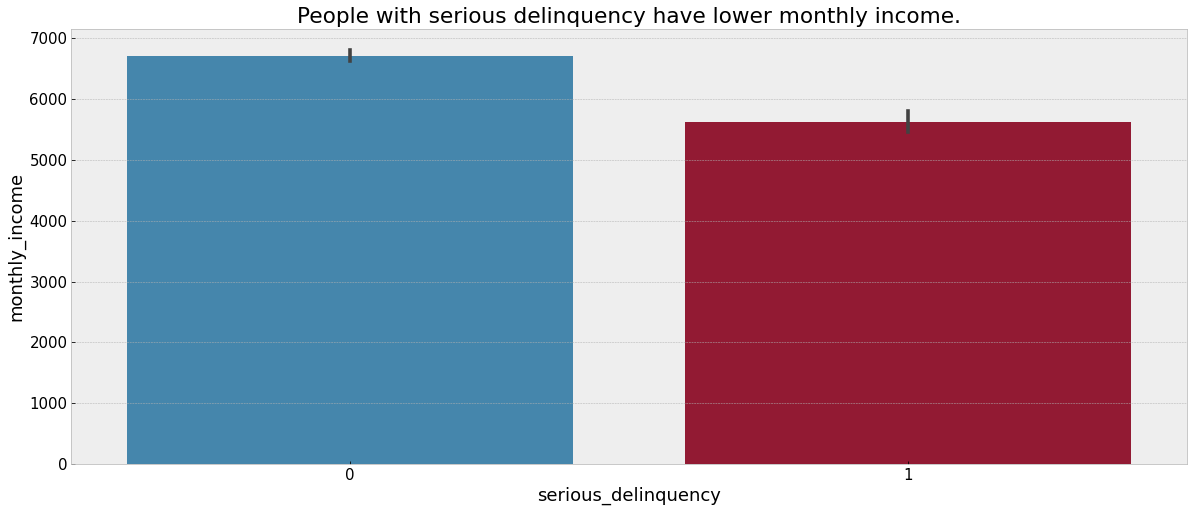

In [24]:
plt.title("People with serious delinquency have lower monthly income.")
sns.barplot(data = train, y = 'monthly_income', x = 'serious_delinquency')
plt.show()

In [25]:
train.groupby(['serious_delinquency']).monthly_income.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,6714.347740,1794060.0
1,0.0,5621.177461,234600.0


### ANSWER:
- Those with serious delinquency make \\$5600 per month on average, \\$1100 less than those without serious delinquency who make \\$6700 per month on average.

### QUESTION

What is the relationship between debt to income ratio and serious delinquency?

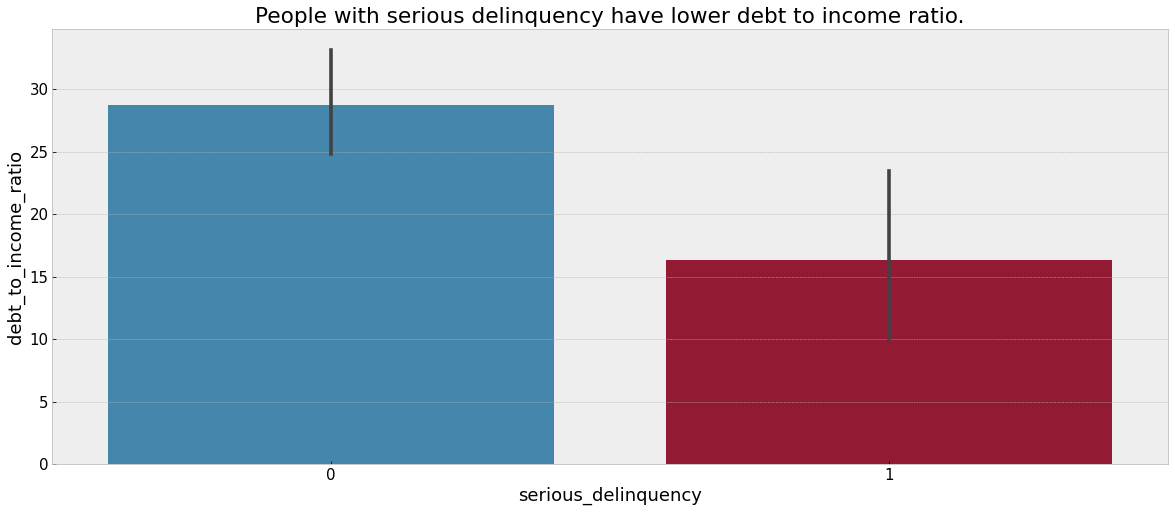

In [26]:
plt.title("People with serious delinquency have lower debt to income ratio.")
sns.barplot(data = train, y = 'debt_to_income_ratio', x = 'serious_delinquency')
plt.show()

In [27]:
# single category, multiple aggregates
train.groupby(['serious_delinquency']).debt_to_income_ratio.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,28.757354,61106.5
1,0.0,16.358447,8901.0


### ANSWER:
- Those with serious delinquency have a 16% debt to income ratio, which is 12% lower than those without serious delinquency, who have a 29% debt to income ratio on average. 

### EXPLORE - Multivariate

1. How is monthly income related to serious_delinquency.

### EXPLORATION SUMMARY

Through exploration, we could see people with serious delinquency have 
- less monthly income
- more dependents
- lower debt to income ratio

===================================================================================================================================

## IV. MODEL

### MODEL - SCALE

===================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS